<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> Low level implementation of a solution by gradient descent. Basic and stochastic approach.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import and init


In [1]:
import numpy as np
import sys

sys.path.append('..')
import fidle.pwk as pwk

from modules.RegressionCooker import RegressionCooker 

# ---- Init Fidle stuffs
#
datasets_dir = pwk.init('GRAD1')

# ---- Instanciate a Regression Cooker
#
cooker = RegressionCooker(pwk)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.5
Notebook id          : GRAD1
Run time             : Tuesday 26 January 2021, 11:05:22
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/tmp/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


<br>**FIDLE 2020 - Regression Cooker**

Version      : 0.1
Run time     : Tuesday 26 January 2021, 11:05:22


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


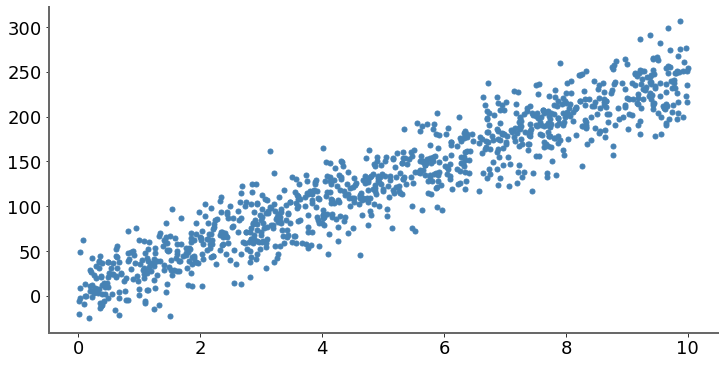

X                :      mean=   5.001  std=   2.885    min=   0.000    max=  10.000
Y                :      mean= 127.079  std=  73.298    min= -92.804    max= 333.932


In [2]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [3]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   5.001  std=   2.885    min=   0.000    max=  10.000
X normalized     :      mean=  -0.000  std=   1.000    min=  -1.733    max=   1.733


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +9.999   -6.000  -1.890   -2.940  +0.019


   20   +4.516   -4.005  -1.262   -1.963  +0.327


   40   +2.072   -2.674  -0.842   -1.310  +0.532


   60   +0.983   -1.785  -0.562   -0.875  +0.669


   80   +0.498   -1.192  -0.375   -0.584  +0.761


  100   +0.281   -0.796  -0.251   -0.390  +0.822


  120   +0.185   -0.531  -0.167   -0.260  +0.863


  140   +0.142   -0.355  -0.112   -0.174  +0.890


  160   +0.123   -0.237  -0.075   -0.116  +0.908


  180   +0.114   -0.158  -0.050   -0.077  +0.920


  200   +0.110   -0.106  -0.033   -0.052  +0.929


<br>**Visualization :**

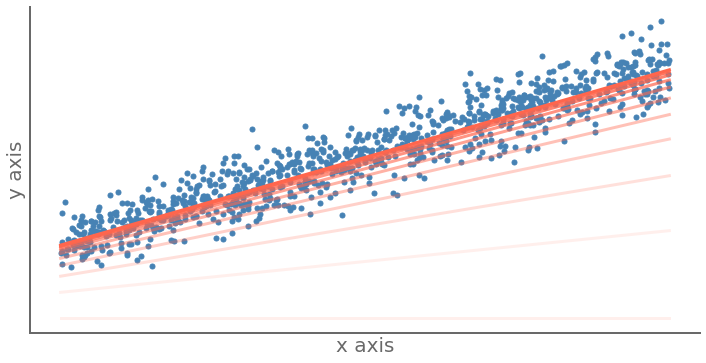

<br>**Loss :**

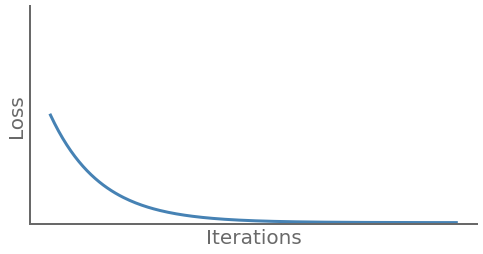

In [4]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.202   +1.415  +5.935   +0.000  +0.924
    1   +0.067   -1.230  -1.037   +0.011  +0.935
    2   +0.116   +1.524  -0.550   +0.016  +0.972
    3   +0.087   -0.167  +0.018   +0.015  +0.975
    4   +0.091   -1.266  -1.868   +0.001  +0.964
    5   +0.038   -0.224  +1.789   +0.020  +0.959
    6   +0.170   -0.049  -0.280   +0.027  +0.945
    7   +0.073   -0.213  -1.968   +0.009  +0.948
    8   +0.077   -1.302  -1.537   +0.008  +0.954
    9   +0.099   +0.767  -0.024   +0.004  +0.950


<br>**Visualization :**

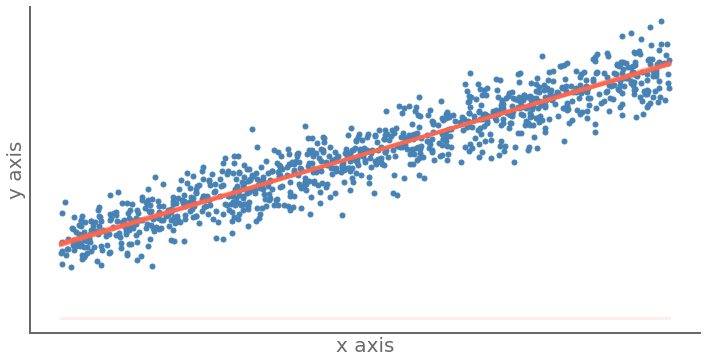

<br>**Loss :**

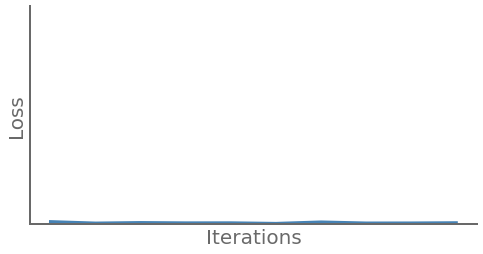

In [5]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [6]:
pwk.end()

End time is : Tuesday 26 January 2021, 11:05:26
Duration is : 00:00:04 015ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>